In [ ]:
!wget https://cernbox.cern.ch/index.php/s/AtBT8y4MiQYFcgc/download -O singlePhoton.hdf5
!wget https://cernbox.cern.ch/index.php/s/FbXw3V4XNyYB3oA/download -O SingleElectron.hdf5
!pip install h5py

--2022-03-28 22:24:51--  https://cernbox.cern.ch/index.php/s/AtBT8y4MiQYFcgc/download
Resolving cernbox.cern.ch (cernbox.cern.ch)... 128.142.53.35, 188.184.97.72, 137.138.120.151, ...
Connecting to cernbox.cern.ch (cernbox.cern.ch)|128.142.53.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 119703858 (114M) [application/octet-stream]
Saving to: ‘singlePhoton.hdf5’

singlePhoton.hdf5   100%[===================>] 114.16M  12.2MB/s    in 11s     

Last-modified header invalid -- time-stamp ignored.
2022-03-28 22:25:05 (10.2 MB/s) - ‘singlePhoton.hdf5’ saved [119703858/119703858]

--2022-03-28 22:25:05--  https://cernbox.cern.ch/index.php/s/FbXw3V4XNyYB3oA/download
Resolving cernbox.cern.ch (cernbox.cern.ch)... 128.142.53.35, 128.142.170.17, 128.142.53.28, ...
Connecting to cernbox.cern.ch (cernbox.cern.ch)|128.142.53.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 128927319 (123M) [application/octet-stream]
Saving to: ‘SingleElectro

In [ ]:
# memory size of numpy array
import os, psutil

def getAmountOfUsedMemoryGb():
    process = psutil.Process(os.getpid())
    return round(process.memory_info().rss / 1024 / 1024 / 1024,3)  # in GB     


In [ ]:
!rm -rf download*
import os
import h5py

print(os.listdir())
photon = h5py.File('singlePhoton.hdf5', 'r')
electron = h5py.File("SingleElectron.hdf5", 'r')

print("Single Photon File")
print(photon.keys())
print(photon['X'], photon['y'])
print("\n")
print("Single Electron File")
print(electron.keys())
print(electron['X'], electron['y'])


['.config', 'SingleElectron.hdf5', 'singlePhoton.hdf5', 'sample_data']
Single Photon File
<KeysViewHDF5 ['X', 'y']>
<HDF5 dataset "X": shape (249000, 32, 32, 2), type "<f4"> <HDF5 dataset "y": shape (249000,), type "<f4">


Single Electron File
<KeysViewHDF5 ['X', 'y']>
<HDF5 dataset "X": shape (249000, 32, 32, 2), type "<f4"> <HDF5 dataset "y": shape (249000,), type "<f4">


In [ ]:
from collections import Counter

import numpy as np
py, ey = np.array(photon['y']), np.array(electron['y'])
pX, eX = np.array(photon['X']), np.array(electron["X"])

print(Counter(py), Counter(ey))

Counter({0.0: 249000}) Counter({1.0: 249000})


In [ ]:
val_to_label = ["photon", 'electron']
getAmountOfUsedMemoryGb()


5.807

In [ ]:
X = np.concatenate([pX, eX], axis=0)
y = np.concatenate([py, ey], axis=0)

# free memory
py, ey = None, None 
pX, eX = None, None

In [ ]:
getAmountOfUsedMemoryGb()

9.612

In [ ]:
def shuffle(X, y):
  idxs = np.arange(X.shape[0])
  idxs = np.random.permutation(idxs)
  return X[idxs], y[idxs]


X, y = shuffle(X, y)
print(getAmountOfUsedMemoryGb(), "Gb")

13.423 Gb


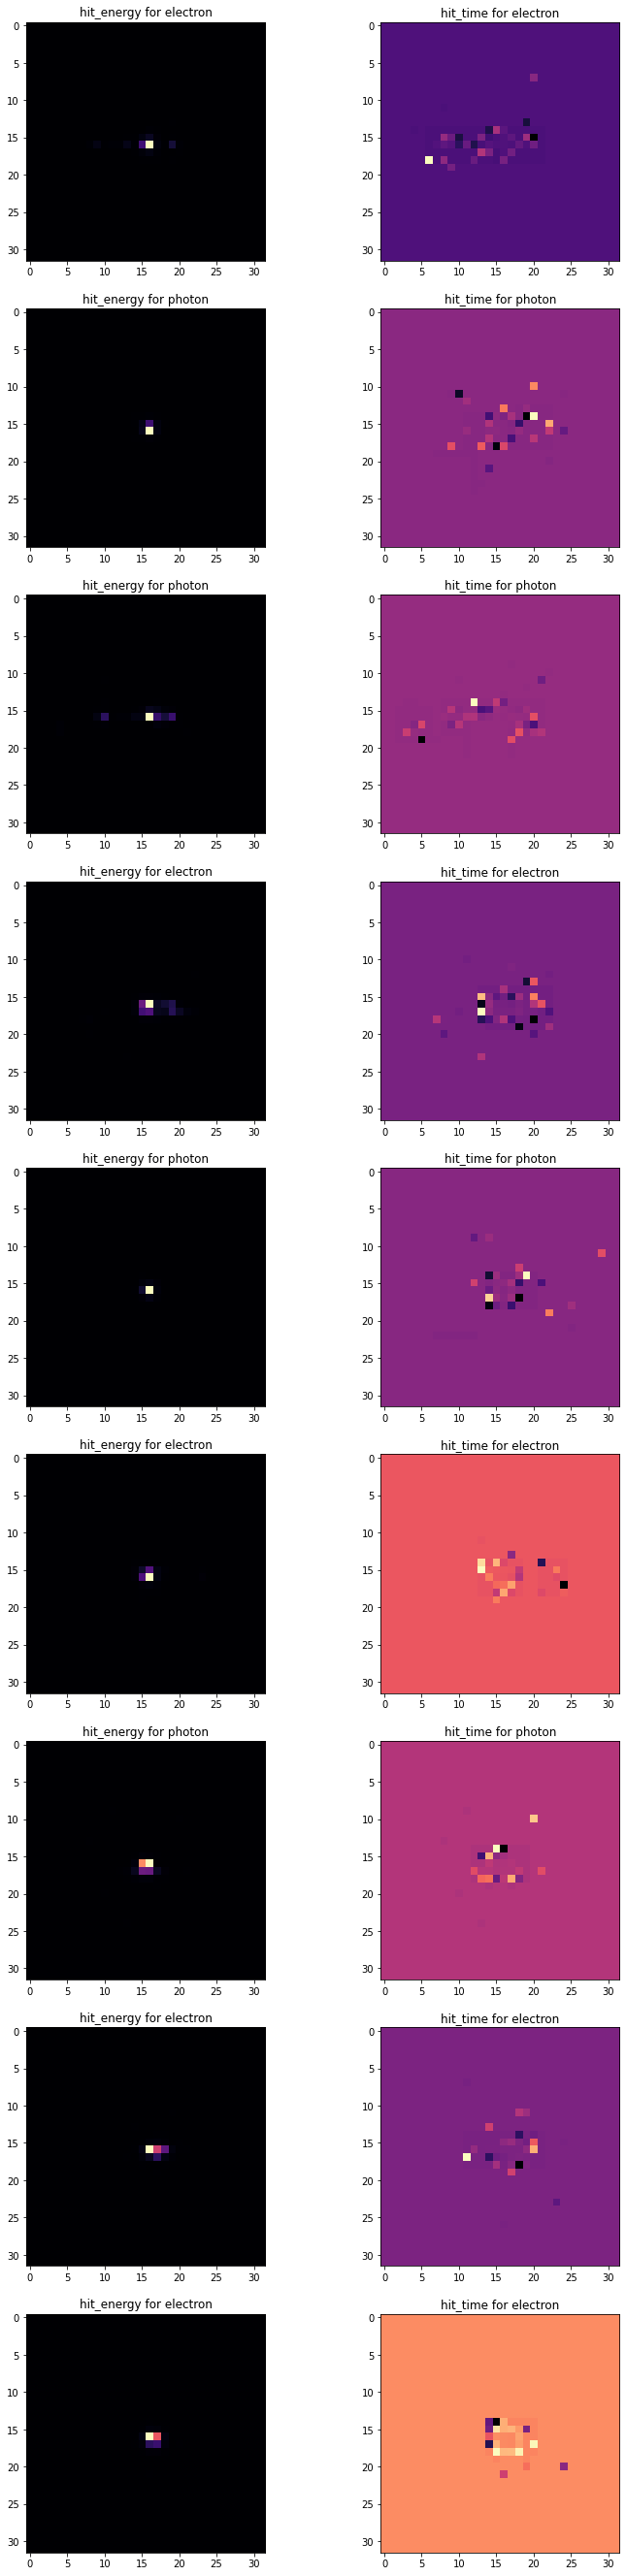

In [ ]:
import matplotlib.pyplot as plt 

def getNRandom(N, Range):
    return np.random.permutation(np.arange(Range))[:N]

v = 9
plt.figure(figsize=(12, 48))

for i,j in enumerate(getNRandom(9, X.shape[0])):
  cls = y[j]
  hit_energy, hit_time = X[j, :, :, 0], X[j, :, :, 1]
  dat = np.concatenate([hit_energy, hit_time], axis = 0)
  plt.subplot(v, 2, 2 * i  + 1)
  plt.imshow(hit_energy, cmap='magma')
  plt.title(f"hit_energy for {val_to_label[int(cls)] }")

  plt.subplot(v, 2, 2 * i  + 2)
  plt.imshow(hit_time,  cmap='magma')
  plt.title(f"hit_time for {val_to_label[int(cls)] }")


In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
data_split = 0.15
idx = int( X.shape[0] * (1 - data_split))

X_train, y_train = X[:idx], y[:idx]
X_test, y_test = X[idx:], y[idx:]

### Model ideas
- [X] Simple : LeNet, high performing MNIST
- [X] Efficient Net 
- [ ] Data Augmentation
- [ ] train longer ( 20 epochs)
- [ ] Input preprocessing
- [ ] Ensemble

Epoch 1/10
13229/13229 [==============================] - 54s 4ms/step - loss: 0.6082 - accuracy: 0.6722 - auc: 0.7274
Epoch 2/10
13229/13229 [==============================] - 51s 4ms/step - loss: 0.5751 - accuracy: 0.7071 - auc: 0.7681
Epoch 3/10
13229/13229 [==============================] - 51s 4ms/step - loss: 0.5649 - accuracy: 0.7157 - auc: 0.7786
Epoch 4/10
13229/13229 [==============================] - 50s 4ms/step - loss: 0.5598 - accuracy: 0.7191 - auc: 0.7837
Epoch 5/10
13229/13229 [==============================] - 50s 4ms/step - loss: 0.5563 - accuracy: 0.7221 - auc: 0.7871
Epoch 6/10
13229/13229 [==============================] - 50s 4ms/step - loss: 0.5536 - accuracy: 0.7239 - auc: 0.7899
Epoch 7/10
13229/13229 [==============================] - 50s 4ms/step - loss: 0.5512 - accuracy: 0.7258 - auc: 0.7921
Epoch 8/10
13229/13229 [==============================] - 50s 4ms/step - loss: 0.5492 - accuracy: 0.7272 - auc: 0.7940
Epoch 9/10
13229/13229 [========================

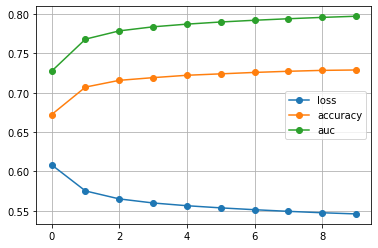

In [ ]:
from tensorflow import keras 
from tensorflow.keras import layers
import time 

t = time.time()

epochs = 10
model = keras.Sequential()
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32,32,2)))
model.add(layers.AveragePooling2D())
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(units=120, activation='relu'))
model.add(layers.Dense(units=84, activation='relu'))
model.add(layers.Dense(units=1, activation = 'sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC()])
history = model.fit(X_train, y_train, epochs=epochs, batch_size=32)
print("Evaluation : ", model.evaluate(X_test, y_test))
print(f"Done in {round(time.time() - t, 2)}")

for d in history.history:
  plt.plot(history.epoch, history.history[d], "-o", label=f"{d}")
plt.legend()
plt.grid()

Epoch 1/5
13229/13229 [==============================] - 85s 6ms/step - loss: 0.5959 - accuracy: 0.6864 - auc_1: 0.7461
Epoch 2/5
13229/13229 [==============================] - 83s 6ms/step - loss: 0.5601 - accuracy: 0.7186 - auc_1: 0.7841
Epoch 3/5
13229/13229 [==============================] - 83s 6ms/step - loss: 0.5530 - accuracy: 0.7247 - auc_1: 0.7910
Epoch 4/5
13229/13229 [==============================] - 83s 6ms/step - loss: 0.5474 - accuracy: 0.7285 - auc_1: 0.7961
Epoch 5/5
2335/2335 [==============================] - 8s 3ms/step - loss: 1.5822 - accuracy: 0.5079 - auc_1: 0.5540
Evaluation :  [1.5822476148605347, 0.5079384446144104, 0.5539544224739075]
Done in 427.99


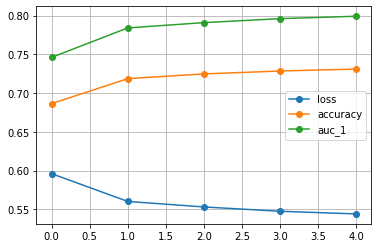

In [ ]:
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.layers import *

model = keras.Sequential()
epochs = 5

t = time.time()

model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(32,32,2), padding='same'))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu",padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu", padding='same'))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu", padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())    

model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu", padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
    
model.add(Flatten())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(1,activation="sigmoid"))
    
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC()])
history = model.fit(X_train, y_train, epochs=epochs, batch_size=32)
print("Evaluation : ", model.evaluate(X_test, y_test))
print(f"Done in {round(time.time() - t, 2)}")

for d in history.history:
  plt.plot(history.epoch, history.history[d], "-o", label=f"{d}")
plt.legend()
plt.grid()

### Efficient Net

In [ ]:
epochs=10
t = time.time()
model = keras.Sequential()
model.add(tf.keras.applications.EfficientNetB0(include_top = False, weights=None, input_shape=(32,32, 2)))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
    
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC()])
history = model.fit(X_train, y_train, epochs=epochs, batch_size=32)
print("Evaluation : ", model.evaluate(X_test, y_test))
print(f"Done in {round(time.time() - t, 2)}")


for d in history.history:
  plt.plot(history.epoch, history.history[d], "-o", label=f"{d}")
plt.legend()
plt.grid()

/usr/local/lib/python3.7/dist-packages/keras/applications/efficientnet.py:294: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 2 input channels.
  weights=weights)


Epoch 1/10
13229/13229 [==============================] - 456s 34ms/step - loss: 0.6672 - accuracy: 0.5952 - auc_2: 0.6250
Epoch 2/10
13229/13229 [==============================] - 447s 34ms/step - loss: 0.6282 - accuracy: 0.6531 - auc_2: 0.7001
Epoch 3/10
13229/13229 [==============================] - 446s 34ms/step - loss: 0.6040 - accuracy: 0.6800 - auc_2: 0.7349
Epoch 4/10
13229/13229 [==============================] - 441s 33ms/step - loss: 0.5806 - accuracy: 0.7024 - auc_2: 0.7625
Epoch 5/10
11765/13229 [=========================>....] - ETA: 49s - loss: 0.5909 - accuracy: 0.6921 - auc_2: 0.7506

In [ ]:
epochs=10
t = time.time()
model = keras.Sequential()
model.add(tf.keras.applications.EfficientNetV2B0(include_top = False, weights=None, input_shape=(32,32, 2)))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
    
    
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC()])
history = model.fit(X_train, y_train, epochs=epochs, batch_size=32)
print("Evaluation : ", model.evaluate(X_test, y_test))
print(f"Done in {round(time.time() - t, 2)}")


for d in history.history:
  plt.plot(history.epoch, history.history[d], "-o", label=f"{d}")
plt.legend()
plt.grid()

In [ ]:
epochs=10
model = keras.Sequential()
model.add(tf.keras.applications.MobileNetV3Small(include_top = False, weights=None, input_shape=(32,32, 2)))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
t = time.time()
    
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC()])
history = model.fit(X_train, y_train, epochs=epochs, batch_size=32)
print("Evaluation : ", model.evaluate(X_test, y_test))
print(f"Done in {round(time.time() - t, 2)}")


for d in history.history:
  plt.plot(history.epoch, history.history[d], "-o", label=f"{d}")
plt.legend()
plt.grid()